In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("diabetes.csv")
df.head

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50 

In [29]:
df.shape

(768, 9)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


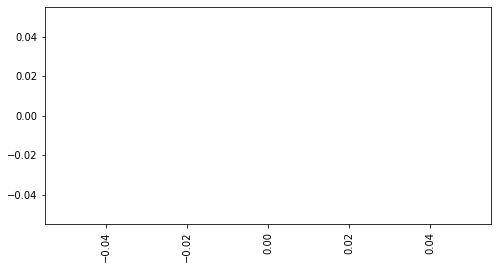

In [31]:

missing = df.isnull().sum(axis = 0)
missing = missing[missing > 0]
missing.sort_values(inplace=True)

plt.figure(figsize = (8, 4))
plt.bar(list(missing.index), np.array(missing))
plt.xticks(rotation='vertical')
plt.show()

使用 np.random.shuffle(df) 函數利用亂數打亂資料順序

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

dataset = df.values
np.random.shuffle(dataset)

X = dataset[:,0:8] # 特徵資料
Y = dataset[:,8] # 標籤資料

In [33]:
X

array([[9.000e+00, 1.120e+02, 8.200e+01, ..., 2.820e+01, 1.282e+00,
        5.000e+01],
       [4.000e+00, 1.250e+02, 8.000e+01, ..., 3.230e+01, 5.360e-01,
        2.700e+01],
       [9.000e+00, 1.450e+02, 8.800e+01, ..., 3.030e+01, 7.710e-01,
        5.300e+01],
       ...,
       [5.000e+00, 1.260e+02, 7.800e+01, ..., 2.960e+01, 4.390e-01,
        4.000e+01],
       [1.000e+01, 1.610e+02, 6.800e+01, ..., 2.550e+01, 3.260e-01,
        4.700e+01],
       [5.000e+00, 1.680e+02, 6.400e+01, ..., 3.290e+01, 1.350e-01,
        4.100e+01]])

In [34]:
Y

array([1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0.

In [35]:
model = Sequential()
                                                       # Keras 的 Sequential 模型不用獨立新增輸入層
model.add(Dense(10, input_dim=8, activation = "relu")) # 隱藏層，10個神經元，8個特徵數(input_dim)，activation啟動函數 relu
model.add(Dense(8, activation = "relu")) # 隱藏層，8個神經元，activation啟動函數 relu
model.add(Dense(1, activation = "sigmoid")) # 輸出層，1個神經元，activation啟動函數 sigmoid
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 10)                90        
_________________________________________________________________
dense_40 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 9         
Total params: 187
Trainable params: 187
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])
# loss 函數，二元分類sigmoid 使用 binary_crossentropy ，多元分類 softmax 使用 categorical_crossentropy
# optimizer 優化器名稱， sgd 為隨機梯度下降法
# metrics 訓練合營估模型的評估標準

In [37]:
model.fit(X,Y,epochs=150,batch_size=10)

Epoch 1/150
77/77 [==============================] - 0s 757us/step - loss: 1.4881 - accuracy: 0.6224
Epoch 2/150
77/77 [==============================] - 0s 808us/step - loss: 0.6743 - accuracy: 0.6458
Epoch 3/150
77/77 [==============================] - 0s 784us/step - loss: 0.6614 - accuracy: 0.6484
Epoch 4/150
77/77 [==============================] - 0s 807us/step - loss: 0.6454 - accuracy: 0.6497
Epoch 5/150
77/77 [==============================] - 0s 860us/step - loss: 0.6467 - accuracy: 0.6549
Epoch 6/150
77/77 [==============================] - 0s 815us/step - loss: 0.6405 - accuracy: 0.6471
Epoch 7/150
77/77 [==============================] - 0s 846us/step - loss: 0.6386 - accuracy: 0.6510
Epoch 8/150
77/77 [==============================] - 0s 835us/step - loss: 0.6360 - accuracy: 0.6536
Epoch 9/150
77/77 [==============================] - 0s 823us/step - loss: 0.6339 - accuracy: 0.6602
Epoch 10/150
77/77 [==============================] - 0s 843us/step - loss: 0.6318 - accura

In [38]:
loss, accuracy = model.evaluate(X, Y, verbose = 0) # verbose = 0 不顯示進度列的執行結果
print("準確度 = {:.2f}".format(accuracy))

準確度 = 0.66


## <font color=red>調整神經網路</font>

### <font color=blue>1.特徵標準化</font>
特徵標準化後，準確度提昇不少

In [39]:
np.random.seed(10)  # 指定亂數種子

df = pd.read_csv("diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)  

X = dataset[:, 0:8]
Y = dataset[:, 8]
X -= X.mean(axis=0) # 特徵標準化
X /= X.std(axis=0)

model = Sequential()
model.add(Dense(10, input_dim = 8, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])


model.fit(X,Y,epochs=150,batch_size=10,verbose=0)
loss, accuracy = model.evaluate(X, Y, verbose = 0) 
print("準確度 = {:.2f}".format(accuracy))


準確度 = 0.80


### <font color=blue>2.輸出層使用 softmax 啟動函數</font>
二元分類也可以使用 softmax 啟動函數，此時輸出層unit須改為 2 ，標籤資料也須執行 One-hot 編碼

使用結果與特徵標準化對於準確度的提升並無差異

In [40]:
from tensorflow.keras.utils import to_categorical

np.random.seed(10)  # 指定亂數種子

df = pd.read_csv("diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)  

X = dataset[:, 0:8]
Y = dataset[:, 8]

X -= X.mean(axis=0)
X /= X.std(axis=0)
Y = to_categorical(Y) # 標籤資料執行 One-hot 編碼

model = Sequential()
model.add(Dense(10, input_dim = 8, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(2, activation = "softmax")) # 使用 softmax 啟動函數

model.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])

model.fit(X, Y, epochs = 150, batch_size = 10, verbose = 0)
loss, accuracy = model.evaluate(X, Y)
print("準確度 = {:.2f}".format(accuracy))

24/24 [==============================] - 0s 1ms/step - loss: 0.4218 - accuracy: 0.7982
準確度 = 0.80


### <font color=blue>3.在神經層使用權重初始器 </font>
使用結果對於準確度的提昇沒有明顯的幫助 

In [41]:
df = pd.read_csv("diabetes.csv")
dataset = df.values

X = dataset[:,0:8]
Y = dataset[:,8]

X -= X.mean(axis=0)
X /= X.std(axis=0)
Y = to_categorical(Y)

model = Sequential()
model.add(Dense(10, input_dim=8, kernel_initializer = "random_uniform", bias_initializer= "ones", activation="relu"))
model.add(Dense(8,kernel_initializer = "random_uniform", bias_initializer= "ones", activation="relu"))
model.add(Dense(2,kernel_initializer = "random_uniform", bias_initializer= "ones", activation="softmax"))
# bias_initializer= "ones" ，全部初始為 1，zeeos ：全部初始為 0
# kernel_initializer = "random_uniform"，均勻分配的隨機亂數，random_nomal ：常態分配的隨機亂數
model.compile(loss = "binary_crossentropy", optimizer = "sgd", metrics=["accuracy"])

model.fit(X, Y, epochs=150, batch_size=10, verbose=0)
loss, accuracy = model.evaluate(X, Y)
print("準確度 = {:.2f}".format(accuracy))

24/24 [==============================] - 0s 1ms/step - loss: 0.4518 - accuracy: 0.7839
準確度 = 0.78


### <font color=blue>4.在編譯模型使用 adam 優化器</font>
對於準確度有些微的提升

In [42]:
np.random.seed(10)  # 指定亂數種子

df = pd.read_csv("diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)  

X = dataset[:, 0:8]
Y = dataset[:, 8]

X -= X.mean(axis=0)
X /= X.std(axis=0)
Y = to_categorical(Y) # 標籤資料執行 One-hot 編碼

model = Sequential()
model.add(Dense(10, input_dim = 8, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(2, activation = "softmax")) # 使用 softmax 啟動函數

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]) # 優化器(optimizer)使用 adam 

model.fit(X, Y, epochs = 150, batch_size = 10, verbose = 0)
loss, accuracy = model.evaluate(X, Y)
print("準確度 = {:.2f}".format(accuracy))

24/24 [==============================] - 0s 1ms/step - loss: 0.3947 - accuracy: 0.8203
準確度 = 0.82


### <font color=blue>5.減少網路神經的參數量</font>
資料集樣本數不多的情況下，可以縮小神經網路的尺寸來改進效能，對於準確度有些微的提升

In [43]:
np.random.seed(10)  # 指定亂數種子

df = pd.read_csv("diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)  

X = dataset[:, 0:8]
Y = dataset[:, 8]

X -= X.mean(axis=0)
X /= X.std(axis=0)
Y = to_categorical(Y) # 標籤資料執行 One-hot 編碼

model = Sequential()
model.add(Dense(10, input_dim = 8, activation = "relu"))
model.add(Dense(6, activation = "relu"))
model.add(Dense(2, activation = "softmax")) # 使用 softmax 啟動函數

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]) # 優化器(optimizer)使用 adam 

model.fit(X, Y, epochs = 150, batch_size = 10, verbose = 0)
loss, accuracy = model.evaluate(X, Y)
print("準確度 = {:.2f}".format(accuracy))
model.summary()

24/24 [==============================] - 0s 864us/step - loss: 0.3736 - accuracy: 0.8229
準確度 = 0.82
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 10)                90        
_________________________________________________________________
dense_55 (Dense)             (None, 6)                 66        
_________________________________________________________________
dense_56 (Dense)             (None, 2)                 14        
Total params: 170
Trainable params: 170
Non-trainable params: 0
_________________________________________________________________


## <font color=red>訓練模型的調整</font>
將資料切割成訓練與測試資料

結果發現，測試集準確度明顯比訓練集的低很多，有 overfitting 的現象

In [44]:
df = pd.read_csv("diabetes.csv")
dataset = df.values
np.random.shuffle(dataset) 

X = dataset[:, 0:8]
Y = dataset[:, 8]

X -= X.mean(axis=0)
X /= X.std(axis=0)
Y = to_categorical(Y)

X_train, Y_train = X[:690], Y[:690]
X_test, Y_test = X[690:], Y[690:]

model = Sequential()
model.add(Dense(10, input_shape=(8,), activation="relu"))
model.add(Dense(6, activation="relu"))
model.add(Dense(2, activation="softmax"))

model.compile(loss="binary_crossentropy", optimizer="adam", 
              metrics=["accuracy"])

model.fit(X_train, Y_train, epochs = 150, batch_size = 10, verbose = 0)
loss, accuracy = model.evaluate(X_train, Y_train)
print("訓練集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試集的準確度 = {:.2f}".format(accuracy))


22/22 [==============================] - 0s 1ms/step - loss: 0.3688 - accuracy: 0.8246
訓練集的準確度 = 0.82
3/3 [==============================] - 0s 1ms/step - loss: 0.5823 - accuracy: 0.7308
測試集的準確度 = 0.73


### <font color=blue>1.使用驗證資料</font>
在訓練模型時使用驗證資料集，將原先的訓練資料切割一部分出來當驗證資料

結果發現，測試集準確度有提升

In [66]:
df = pd.read_csv("diabetes.csv")
dataset = df.values
np.random.shuffle(dataset) 

X = dataset[:, 0:8]
Y = dataset[:, 8]

X -= X.mean(axis=0)
X /= X.std(axis=0)
Y = to_categorical(Y)

X_train, Y_train = X[:690], Y[:690]
X_test, Y_test = X[690:], Y[690:]

model = Sequential()
model.add(Dense(10, input_shape=(8,), activation="relu"))
model.add(Dense(6, activation="relu"))
model.add(Dense(2, activation="softmax"))

model.compile(loss="binary_crossentropy", optimizer="adam", 
              metrics=["accuracy"])

history = model.fit(X_train1, Y_train1, validation_split = 0.2, epochs = 150, batch_size = 10, verbose = 0) 
# 使用 validation_split = 0.2 自動將訓練資料切割
loss, accuracy = model.evaluate(X_train, Y_train)


print("訓練集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試集的準確度 = {:.2f}".format(accuracy))


22/22 [==============================] - 0s 1ms/step - loss: 0.4278 - accuracy: 0.7971
訓練集的準確度 = 0.80
3/3 [==============================] - 0s 2ms/step - loss: 0.4544 - accuracy: 0.7564
測試集的準確度 = 0.76


### <font color=blue>2.尋找最佳訓練週期</font>
透過圖表分析發現，驗證資料約在第10次左右的訓練週期，loss 就沒有再減少，爾後再多的訓練週期 loss 逐漸提升，此即表示執行在多次的訓練週期只會讓模型更佳的 overfitting。

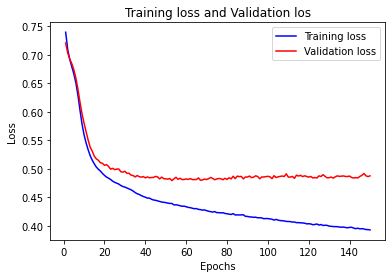

In [70]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, "b-", label = "Training loss")
plt.plot(epochs, val_loss , "r", label = "Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training loss and Validation los")
plt.legend()
plt.show()

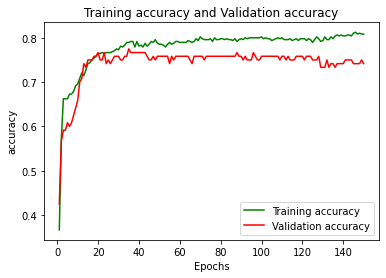

In [71]:
import matplotlib.pyplot as plt

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1, len(loss)+1)

plt.plot(epochs, acc, "g-", label = "Training accuracy")
plt.plot(epochs, val_acc , "r-", label = "Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.title("Training accuracy and Validation accuracy")
plt.legend()
plt.show()

### <font color=blue>3.修改訓練週期(epochs)</font>
將 epochs 改成 10 後，驗證資料的 loss 幾乎是持平，只是和訓練集的 loss 仍有一些差距，表示有輕度的 overfitting，但已大幅改善。

In [76]:
df = pd.read_csv("diabetes.csv")
dataset = df.values
np.random.shuffle(dataset) 

X = dataset[:, 0:8]
Y = dataset[:, 8]

X -= X.mean(axis=0)
X /= X.std(axis=0)
Y = to_categorical(Y)

X_train, Y_train = X[:690], Y[:690]
X_test, Y_test = X[690:], Y[690:]

model = Sequential()
model.add(Dense(10, input_shape=(8,), activation="relu"))
model.add(Dense(6, activation="relu"))
model.add(Dense(2, activation="softmax"))

model.compile(loss="binary_crossentropy", optimizer="adam", 
              metrics=["accuracy"])

history = model.fit(X_train, Y_train, validation_split = 0.2, epochs = 10, batch_size = 10, verbose = 0) 
loss, accuracy = model.evaluate(X_train, Y_train)

print("訓練集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試集的準確度 = {:.2f}".format(accuracy))


22/22 [==============================] - 0s 1ms/step - loss: 0.5183 - accuracy: 0.7594
訓練集的準確度 = 0.76
3/3 [==============================] - 0s 2ms/step - loss: 0.5005 - accuracy: 0.7821
測試集的準確度 = 0.78


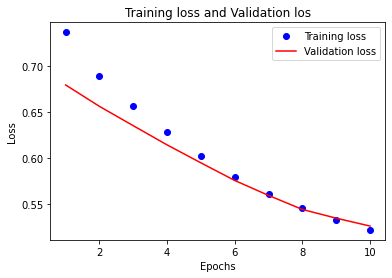

In [77]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss , "r", label = "Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training loss and Validation los")
plt.legend()
plt.show()

## <font color=red>模型的預測值</font>

In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

df = pd.read_csv("diabetes.csv")
dataset = df.values
X = dataset[:,0:8]
Y = dataset[:,8]

X -= X.mean(axis=0)
X /= X.std(axis=0)
#Y = to_categorical(Y)，activation = "softmax" 時可以使用

X_train, Y_train = X[:690], Y[:690]
X_test, Y_test = X[690:], Y[690:]

model = Sequential()
model.add(Dense(8, input_dim = 8, activation= "relu"))
model.add(Dense(8,activation = "relu"))
model.add(Dense(1,activation = "sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics = ["accuracy"])
# model.compile(loss="binary_crossentropy", optimizer="adam", metrics=  ["accuracy"])


model.fit(X_train, Y_train, epochs = 10, batch_size = 10, verbose = 0)
#
model.fit(X_train, Y_train, epochs=10,   batch_size=10, verbose=0)

loss, accuracy = model.evaluate(X_train, Y_train)
print("訓練集準確度 = {:.2F}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test)
print("訓練集準確度 = {:.2F}".format(accuracy))

Y_pred = model.predict_classes(X_test, batch_size = 10, verbose = 2)
# Y_pred = model.predict(X_test, batch_size=10, verbose=0) 預測機率值

print(Y_pred[0], Y_pred[1])

22/22 [==============================] - 0s 817us/step - loss: 0.4419 - accuracy: 0.7855
訓練集準確度 = 0.79
3/3 [==============================] - 0s 1ms/step - loss: 0.4995 - accuracy: 0.7692
訓練集準確度 = 0.77
8/8 - 0s
[0] [1]


C:\Users\user\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
